# `agessc` checks

This notebook is just to check things on water age `agessc`.

## 1. Load packages

In [1]:
# Ignore warnings
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

In [2]:
# Load intake and cosima cookbook
import intake

# Load numpy for numbers!
import numpy as np

# Load pandas for DataFrame manipulations
import pandas as pd

In [3]:
# Load catalog
cat_str = "/g/data/dk92/catalog/v2/esm/cmip6-fs38/catalog.json"

In [4]:
# The catalog
cat = intake.open_esm_datastore(cat_str)
cat

,unique
path,1054133
file_type,2
realm,7
frequency,10
table_id,24
project_id,1
institution_id,3
source_id,4
experiment_id,52
member_id,80


List all the models in the catalog:

In [5]:
models = np.sort(cat.search(realm = 'ocean').df.source_id.unique())
print(*models, sep = "\n")

ACCESS-CM2
ACCESS-ESM1-5
ACCESS-OM2
ACCESS-OM2-025


### Let's check where are the `volcello` and `areacello` files (fixed or monthly)?

In [6]:
volcello_frequencies = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "volcello",
).df.table_id.unique()

areacello_frequencies = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "areacello",
).df.table_id.unique()

print("volcello frequencies: ", volcello_frequencies)
print("areacello frequencies: ", areacello_frequencies)

volcello frequencies:  ['Omon' 'Ofx']
areacello frequencies:  ['Ofx']


So `volcello` is both available as fixed and monthly and `areacello` only as fixed. For simplicity, I'll use the fixed version in both cases, but maybe this is not a good idea (I added this check as an item to my TODO list). 

Location of the fixed files are given by:

In [7]:
volcello_path = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "volcello",
    table_id = "Ofx",
).df.path[0]

areacello_path = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "areacello",
    table_id = "Ofx",
).df.path[0]

print("volcello path: ", volcello_path)
print("areacello path: ", areacello_path)

volcello path:  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Ofx/volcello/gn/files/d20191115/volcello_Ofx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc
areacello path:  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Ofx/areacello/gn/files/d20191115/areacello_Ofx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc


In [8]:
cat.search(
    source_id = "ACCESS-ESM1-5",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
).df.member_id.unique()

array(['r29i1p1f1', 'r21i1p1f1', 'r1i1p1f1', 'r39i1p1f1', 'r31i1p1f1',
       'r4i1p1f1', 'r13i1p1f1', 'r27i1p1f1', 'r30i1p1f1', 'r2i1p1f1',
       'r38i1p1f1', 'r37i1p1f1', 'r23i1p1f1', 'r15i1p1f1', 'r28i1p1f1',
       'r17i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r9i1p1f1', 'r36i1p1f1',
       'r22i1p1f1', 'r26i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r40i1p1f1',
       'r5i1p1f1', 'r20i1p1f1', 'r14i1p1f1', 'r6i1p1f1', 'r32i1p1f1',
       'r33i1p1f1', 'r11i1p1f1', 'r34i1p1f1', 'r25i1p1f1', 'r12i1p1f1',
       'r18i1p1f1', 'r3i1p1f1', 'r10i1p1f1', 'r24i1p1f1', 'r35i1p1f1'],
      dtype=object)

In [9]:
cat.search(
    source_id = "ACCESS-CM2",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
).df.member_id.unique()

array(['r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1', 'r6i1p1f1',
       'r3i1p1f1', 'r5i1p1f1', 'r4i1p1f1', 'r2i1p1f1', 'r1i1p1f1'],
      dtype=object)

In [10]:
piControl = cat.search(
    source_id = "ACCESS-CM2",
    experiment_id = "piControl",
    realm = "ocean",
    variable_id = "agessc",
    file_type = "l",
)
piControl.df.time_range

0     131001-131912
1     098001-098912
2     133001-133912
3     144001-144912
4     129001-129912
5     125001-125912
6     135001-135912
7     109001-109912
8     143001-143912
9     096001-096912
10    139001-139912
11    116001-116912
12    114001-114912
13    107001-107912
14    101001-101912
15    140001-140912
16    105001-105912
17    111001-111912
18    110001-110912
19    137001-137912
20    122001-122912
21    103001-103912
22    108001-108912
23    099001-099912
24    136001-136912
25    104001-104912
26    119001-119912
27    124001-124912
28    130001-130912
29    106001-106912
30    141001-141912
31    123001-123912
32    100001-100912
33    097001-097912
34    127001-127912
35    121001-121912
36    113001-113912
37    112001-112912
38    118001-118912
39    134001-134912
40    128001-128912
41    142001-142912
42    120001-120912
43    115001-115912
44    095001-095912
45    126001-126912
46    132001-132912
47    102001-102912
48    117001-117912
49    138001-138912


In [28]:
agescc_historical_cat = cat.search(
    source_id = "ACCESS-ESM1-5",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
    member_id = "r1i1p1f1",
    file_type = "l",
)
agescc_historical_cat

,unique
path,17
file_type,1
realm,1
frequency,1
table_id,1
project_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1


In [18]:
agescc_piControl_cat = cat.search(
    source_id = "ACCESS-ESM1-5",
    experiment_id = "piControl",
    realm = "ocean",
    variable_id = "agessc",
    member_id = "r1i1p1f1",
    file_type = "l",
)
agescc_piControl_cat

,unique
path,240
file_type,1
realm,1
frequency,1
table_id,1
project_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1


In [14]:
import xarray as xr

In [23]:
ds_piControl = xr.open_mfdataset(agescc_piControl_cat.df.path)
# ds = xr.open_dataset(agescc_path)
ds_piControl

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/coding/times.py:170: SerializationWarning: Ambiguous reference date string: 101-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0101-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/indexing.py:525: SerializationWarning: Unable to decode time axis into full n

<xarray.Dataset> Size: 342GB
Dimensions:             (time: 12000, bnds: 2, lev: 50, j: 300, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) object 96kB 0101-01-16 12:00:00 ... 1100-12-16...
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object 192kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (time, lev, bnds) float64 10MB dask.array<chunksize=(120, 50, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 41GB dask.array<chunksize=(120, 300, 360, 2), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 41GB dask.array<chunksize=(120, 300, 360, 2), meta=np.ndarray>
    agessc              (time, lev, j, i) float32 259GB dask.array<chunksize=(1, 25, 150, 180), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36524.0
    creation_date:          2019-11-12T22:37:14Z
    ...                     ...
    variable_id:            agessc
    variant_label:          r1i1p1f1
    version:                v20191112
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/59e72db4-a3b5-45f3-9af8-6556b16e08fb
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [29]:
ds_historical = xr.open_mfdataset(agescc_historical_cat.df.path)
# ds = xr.open_dataset(agescc_path)
ds_historical

<xarray.Dataset> Size: 56GB
Dimensions:             (time: 1980, bnds: 2, lev: 50, j: 300, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds            (time, lev, bnds) float64 2MB dask.array<chunksize=(120, 50, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 7GB dask.array<chunksize=(120, 300, 360, 2), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 7GB dask.array<chunksize=(120, 300, 360, 2), meta=np.ndarray>
    agessc              (time, lev, j, i) float32 43GB dask.array<chunksize=(1, 25, 150, 180), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T15:37:53Z
    ...                     ...
    variable_id:            agessc
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/26dd46b9-8134-4294-a70c-f76846ea1457
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [24]:
import datetime

In [25]:
age2D_piControl = ds_piControl["agessc"].sel(time=datetime.datetime(2000, 1, 1), lev=1000, method='nearest')
age2D_piControl

<xarray.DataArray 'agessc' (j: 300, i: 360)> Size: 432kB
dask.array<getitem, shape=(300, 360), dtype=float32, chunksize=(150, 180), chunktype=numpy.ndarray>
Coordinates:
    time       object 8B 1100-12-16 12:00:00
    lev        float64 8B 969.1
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_age_since_surface_contact
    long_name:      Sea Water Age Since Surface Contact
    comment:        Time elapsed since water was last in surface layer of the...
    units:          yr
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-12T22:37:11Z altered by CMOR: replaced missing va...

In [30]:
age2D_historical = ds_historical["agessc"].sel(time=datetime.datetime(2000, 1, 1), lev=1000, method='nearest')
age2D_historical

<xarray.DataArray 'agessc' (j: 300, i: 360)> Size: 432kB
dask.array<getitem, shape=(300, 360), dtype=float32, chunksize=(150, 180), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2000-01-16T12:00:00
    lev        float64 8B 969.1
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_age_since_surface_contact
    long_name:      Sea Water Age Since Surface Contact
    comment:        Time elapsed since water was last in surface layer of the...
    units:          yr
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-15T15:37:49Z altered by CMOR: replaced missing va...

In [22]:
import matplotlib as plt

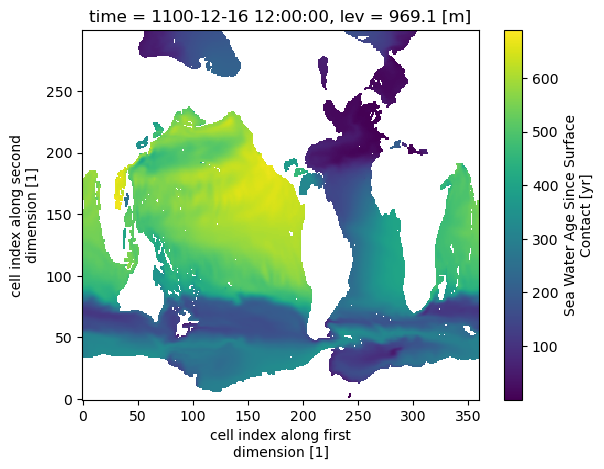

In [26]:
age2D_piControl.plot()

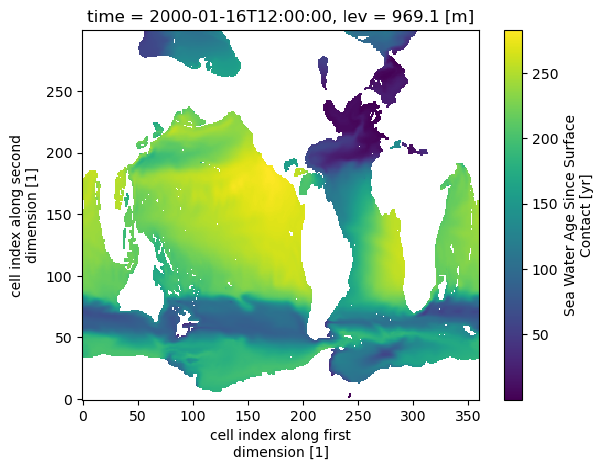

In [31]:
age2D_historical.plot()

List of members

In [10]:
members = np.sort(cat.search(source_id = model, realm = 'ocean').df.member_id.unique())
print(*members, sep = "\n")

NameError: name 'model' is not defined

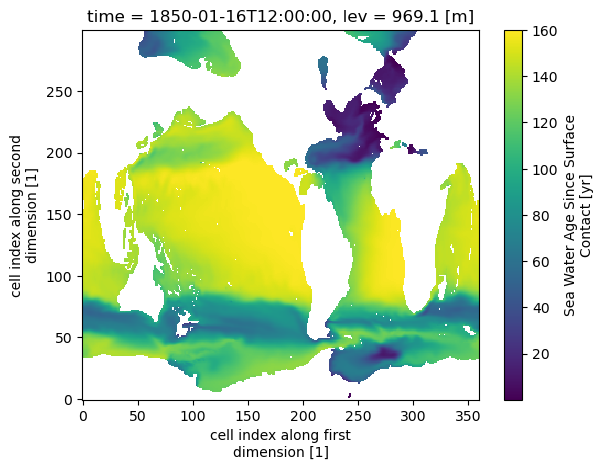

In [32]:
age2D_historical_2 = ds_historical["agessc"].sel(time=datetime.datetime(1800, 1, 1), lev=1000, method='nearest')
age2D_historical_2.plot()

In [ ]:
def list_models_and_members_that_have(cat, variables):
    """
    find the list of models and their members that have all the variables: 'uo', 'vo', and 'mlotst'.
    """
    # Step 1: Filter the dataframe to include only the specified variables
    filtered_df = cat.search(variable_id = variables).df
    
    # Step 2: Group by 'model' and 'member'
    grouped = filtered_df.groupby(['source_id', 'member_id'])
    
    # Step 3: Find groups that contain all three variables
    valid_groups = grouped.filter(lambda x: set(variables).issubset(set(x['variable_id'])))
    
    # Step 4: Get the list of models and their members
    result = valid_groups[['source_id', 'member_id']].drop_duplicates().reset_index(drop=True)
    
    # Step 5: Sort the result by model
    result_sorted = result.sort_values(by='source_id')

    # Setp 6: Regroup by model
    grouped_result_sorted = result_sorted.groupby('source_id')
    
    return grouped_result_sorted.apply(display)

In [ ]:
def summary_variable_availability(df):

    # Step 1: Filter the dataframe to include only the specified variables
    filtered_df_1 = df[df['variable_id'].isin(['umo', 'vmo'])]
    filtered_df_2 = df[df['variable_id'].isin(['uo', 'vo'])]
    filtered_df_3 = df[df['variable_id'].isin(['mlotst'])]
    filtered_df_4 = df[df['variable_id'].isin(['mlotstmax'])]
    
    # Step 2: Group by 'source_id' and 'member_id'
    grouped_1 = filtered_df_1.groupby(['experiment_id', 'source_id', 'member_id'])
    grouped_2 = filtered_df_2.groupby(['experiment_id', 'source_id', 'member_id'])
    grouped_3 = filtered_df_3.groupby(['experiment_id', 'source_id', 'member_id'])
    grouped_4 = filtered_df_4.groupby(['experiment_id', 'source_id', 'member_id'])
    
    # Step 3: Find groups that contain all the variables in each set
    valid_groups_1 = grouped_1.filter(lambda x: set(['umo', 'vmo']).issubset(set(x['variable_id'])))
    valid_groups_2 = grouped_2.filter(lambda x: set(['uo', 'vo']).issubset(set(x['variable_id'])))
    valid_groups_3 = grouped_3.filter(lambda x: set(['mlotst']).issubset(set(x['variable_id'])))
    valid_groups_4 = grouped_4.filter(lambda x: set(['mlotstmax']).issubset(set(x['variable_id'])))
    
    # Step 4: Get the list of source_id and their member_id for each set
    result_1 = valid_groups_1[['experiment_id', 'source_id', 'member_id']].drop_duplicates().reset_index(drop=True)
    result_2 = valid_groups_2[['experiment_id', 'source_id', 'member_id']].drop_duplicates().reset_index(drop=True)
    result_3 = valid_groups_3[['experiment_id', 'source_id', 'member_id']].drop_duplicates().reset_index(drop=True)
    result_4 = valid_groups_4[['experiment_id', 'source_id', 'member_id']].drop_duplicates().reset_index(drop=True)
    
    # Step 5: Group by 'source_id' and aggregate member_id into a list for each set
    final_result_1 = result_1.groupby(['experiment_id', 'source_id'])['member_id'].apply(list).reset_index()
    final_result_2 = result_2.groupby(['experiment_id', 'source_id'])['member_id'].apply(list).reset_index()
    final_result_3 = result_3.groupby(['experiment_id', 'source_id'])['member_id'].apply(list).reset_index()
    final_result_4 = result_4.groupby(['experiment_id', 'source_id'])['member_id'].apply(list).reset_index()
    
    # Step 6: Merge the results into a single dataframe
    merged_result_1 = pd.merge(final_result_1, final_result_2, on=['experiment_id', 'source_id'], how='outer', suffixes=('_umo_vmo', '_uo_vo'))
    merged_result_2 = pd.merge(merged_result_1, final_result_3, on=['experiment_id', 'source_id'], how='outer', suffixes=('', '_mlotst'))
    merged_result_3 = pd.merge(merged_result_2, final_result_4, on=['experiment_id', 'source_id'], how='outer', suffixes=('', '_mlotstmax'))

    final_restult = merged_result_3.sort_values(by='source_id')
    
    return final_restult

In [ ]:
summary_variable_availability(cat.df)

In [ ]:
model

In [ ]:
list_models_and_members_that_have(cat, ['umo', 'vmo', 'mlotst'])

In [16]:
ensemble = "r1i1p1f1"

In [17]:
year_start = 1990
num_years = 10

In [18]:
def variable_availability_check(cat, **kwargs):
    """
    List the relevant variables available and if more is needed.
    """
    searched_cat = cat.search(**kwargs)
    umo_cat = searched_cat.search(variable_id = "umo")
    vmo_cat = searched_cat.search(variable_id = "vmo")
    mlotstmo_cat = searched_cat.search(variable_id = "mlotst")

    print("\numo:\n")
    print(available_time_window(umo_cat))
    print("\nvmo:\n")
    print(available_time_window(vmo_cat))
    print("\nmlotst:\n")
    print(available_time_window(mlotstmo_cat))

    return


def available_time_window(cat):
    time_ranges = cat.df.time_range.unique()
    idx = np.argsort([int(foo[0:4]) for foo in time_ranges if foo != 'na'])
    # return time_ranges[idx]
    return time_ranges[idx]

In [19]:
model, experiment, ensemble

('ACCESS-ESM1-5', 'historical', 'r1i1p1f1')

In [20]:
variable_availability_check(cat,
    source_id = model,
    experiment_id = experiment,
    member_id = ensemble,    
    realm = 'ocean'
)                            


umo:

['185001-185912' '186001-186912' '187001-187912' '188001-188912'
 '189001-189912' '190001-190912' '191001-191912' '192001-192912'
 '193001-193912' '194001-194912' '195001-195912' '196001-196912'
 '197001-197912' '198001-198912' '199001-199912' '200001-200912'
 '201001-201412']

vmo:

['185001-185912' '186001-186912' '187001-187912' '188001-188912'
 '189001-189912' '190001-190912' '191001-191912' '192001-192912'
 '193001-193912' '194001-194912' '195001-195912' '196001-196912'
 '197001-197912' '198001-198912' '199001-199912' '200001-200912'
 '201001-201412']

mlotst:

['185001-201412']


In [21]:
# Check that catalog contains the data requested before creating empty directories
searched_cat = cat.search(
    source_id = model,
    experiment_id = experiment,
    member_id = ensemble,
    variable_id = ["umo", "vmo", "mlotst"],
    realm = 'ocean')
np.sort(searched_cat.df.source_id.unique())

array(['ACCESS-ESM1-5'], dtype=object)

In [22]:
searched_searched_cat = searched_cat.search(variable_id = "uo")
searched_searched_cat.df.variable_id.unique()

array([], dtype=object)

In [23]:
np.sort([int(foo[0:4]) for foo in searched_cat.df.time_range.unique() if foo != 'na'])

array([1850, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940,
       1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [28]:
# Create directory on gdata
datadir = '/scratch/xv83/TMIP/data'
start_time, end_time = time_window_strings(year_start, num_years)
start_time_str = start_time.strftime("%b%Y")
end_time_str = end_time.strftime("%b%Y")

outputdir = f'{datadir}/{model}/{experiment}/{ensemble}/{start_time_str}-{end_time_str}'
print(outputdir)

/scratch/xv83/TMIP/data/ACCESS-ESM1-5/historical/r1i1p1f1/Jan1990-Dec1999


In [29]:
makedirs(outputdir, exist_ok=True)

In [30]:
########## Start the client and make the `.nc` files ##########
print("Starting client")
client = Client(n_workers=4)#, threads_per_worker=1, memory_limit='16GB') # Note: with 1thread/worker cannot plot thetao. Maybe I need to understand why?
client

Starting client


In [31]:
# umo dataset
print("Loading umo data")
umo_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "umo",
    frequency = "mon",
)
print("\numo_datadask: ", umo_datadask)

Loading umo data

umo_datadask:  <xarray.Dataset> Size: 43GB
Dimensions:             (time: 1980, lev: 50, j: 300, i: 360, bnds: 2,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(120, 2), meta=np.ndarray>
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
    lev_bnds            (lev, bnds) float64 800B dask.array<chunksize=(50, 2), meta=np.ndarray>
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    

In [32]:
# vmo dataset
print("Loading vmo data")
vmo_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "vmo",
    frequency = "mon",
)
print("\nvmo_datadask: ", vmo_datadask)

Loading vmo data

vmo_datadask:  <xarray.Dataset> Size: 43GB
Dimensions:             (time: 1980, lev: 50, j: 300, i: 360, bnds: 2,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(120, 2), meta=np.ndarray>
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
    lev_bnds            (lev, bnds) float64 800B dask.array<chunksize=(50, 2), meta=np.ndarray>
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    

In [33]:
# mlotst dataset
print("Loading mlotst data")
mlotst_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "mlotst",
    frequency = "mon",
)
print("\nmlotst_datadask: ", mlotst_datadask)

Loading mlotst data

mlotst_datadask:  <xarray.Dataset> Size: 864MB
Dimensions:             (time: 1980, bnds: 2, j: 300, i: 360, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    mlotst              (time, j, i) flo

In [34]:
# Deal with thkcello for a different script,
# given that its location (fixed or time-dependent) depends on the model and/or project
# # thkcello dataset
# print("Loading thkcello data")
# thkcello_datadask = select_latest_data(searched_cat,
#     dict(
#         chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
#     ),
#     variable_id = "thkcello",
#     frequency = "mon",
# )
# print("\nthkcello_datadask: ", thkcello_datadask)

In [35]:
# Slice umo dataset for the time period
umo_datadask_sel = umo_datadask.sel(time=slice(start_time, end_time))
# Take the time average of the monthly evaporation (using month length as weights)
umo = umo_datadask_sel["umo"].weighted(umo_datadask_sel.time.dt.days_in_month).mean(dim="time")
umo

<xarray.DataArray 'umo' (lev: 50, j: 300, i: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(50, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>

In [36]:
# Slice vmo dataset for the time period
vmo_datadask_sel = vmo_datadask.sel(time=slice(start_time, end_time))
# Take the time average of the monthly evaporation (using month length as weights)
vmo = vmo_datadask_sel["vmo"].weighted(vmo_datadask_sel.time.dt.days_in_month).mean(dim="time")
vmo

<xarray.DataArray 'vmo' (lev: 50, j: 300, i: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(50, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>

In [37]:
# Slice mlotst dataset for the time period
mlotst_datadask_sel = mlotst_datadask.sel(time=slice(start_time, end_time))
# Take the time mean of the yearly maximum of mlotst
mlotst_yearlymax = mlotst_datadask_sel.groupby("time.year").max(dim="time")
mlotst_yearlymax

<xarray.Dataset> Size: 75MB
Dimensions:             (year: 10, bnds: 2, j: 300, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
  * year                (year) int64 80B 1990 1991 1992 1993 ... 1997 1998 1999
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (year, bnds) datetime64[ns] 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
    mlotst              (year, j, i) float32 4MB dask.array<chunksize=(10, 60, 60), meta=np.ndarray>
    vertices_latitude   (year, j, i, vertices) float64 35MB dask.array<chunksize=(10, 60, 60, 2), meta=np.ndarray>
    vertices_longitude  (year, j, i, vertices) float64 35MB dask.array<chunksize=(10, 60, 60, 2), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            21915.0
    creation_date:                    2019-11-15T15:38:06Z
    ...                               ...
    intake_esm_attrs:variable_id:     mlotst
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20191115
    intake_esm_attrs:time_range:      185001-201412
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           l.CMIP.CSIRO.ACCESS-ESM1-5.historical.r...

In [38]:
mlotst = mlotst_yearlymax.mean(dim="year")
mlotst

<xarray.Dataset> Size: 9MB
Dimensions:             (j: 300, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
Dimensions without coordinates: vertices
Data variables:
    mlotst              (j, i) float32 432kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>

In [39]:
# # Slice thkcello dataset for the time period
# thkcello_datadask_sel = thkcello_datadask.sel(time=slice(start_time, end_time))
# # Take the time average of the monthly evaporation (using month length as weights)
# thkcello = thkcello_datadask_sel["thkcello"].weighted(thkcello_datadask_sel.time.dt.days_in_month).mean(dim="time")

In [40]:
# Save to netcdfs (and compute!)
umo.to_netcdf(f'{outputdir}/umo.nc', compute=True)
vmo.to_netcdf(f'{outputdir}/vmo.nc', compute=True)
mlotst.to_netcdf(f'{outputdir}/mlotst.nc', compute=True)
# thkcello.to_netcdf(f'{outputdir}/thkcello.nc', compute=True)

In [41]:
client.close()